## Miguel Grella
# EDA and Database Normalization for the Fossil Fuels Table

In [1]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#set working directory
os.chdir(r"C:\Users\mikeg\OneDrive - Indiana University\sp23_applied_database_technologies_13804\final_project_repo")

In [3]:
#get path for working directory
path = os.getcwd()

#read the data
energy_df = pd.read_csv(path + '\\raw_data\\energy_dataset.csv')

#read the data
weather_df = pd.read_csv(path + '\\raw_data\\weather_features.csv')


In [4]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


# 1. This section only uses the energy dataset

In [5]:
#convert time column to datetime and remove time zone
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)


#Reformat the time column to only show the date and 24 hour time
energy_df['time'] = energy_df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

#convert time column back to datetime and remove time zone
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=False)



In [6]:
#chech data types
energy_df.dtypes

time                                           datetime64[ns]
generation biomass                                    float64
generation fossil brown coal/lignite                  float64
generation fossil coal-derived gas                    float64
generation fossil gas                                 float64
generation fossil hard coal                           float64
generation fossil oil                                 float64
generation fossil oil shale                           float64
generation fossil peat                                float64
generation geothermal                                 float64
generation hydro pumped storage aggregated            float64
generation hydro pumped storage consumption           float64
generation hydro run-of-river and poundage            float64
generation hydro water reservoir                      float64
generation marine                                     float64
generation nuclear                                    float64
generati

In [7]:
energy_df.shape

(35064, 29)

In [8]:
#Check for missing values
energy_df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [9]:
#drop columns where all values are missing
energy_df = energy_df.dropna(axis=1, how='all')

In [10]:
#set time as index
energy_df = energy_df.set_index('time', drop=True)

#First 1/2 of columns
energy_df.iloc[:, :int(energy_df.shape[1]/2)].head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine
time,,,,,,,,,,,,,
2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,1051.0,1899.0,0.0
2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,1009.0,1658.0,0.0
2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,973.0,1371.0,0.0
2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,949.0,779.0,0.0
2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,953.0,720.0,0.0


In [11]:
#Second 1/2 of columns
energy_df.iloc[:, int(energy_df.shape[1]/2):].head()

,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,
2014-12-31 23:00:00,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


2. Organize columns by generation type

In [12]:
#Pass all columns to a list
cols = energy_df.columns.tolist()

#resrict the list to the columns containing 'fossil'
fossil_cols = [col for col in cols if 'fossil' in col]

#Restrict the list to the columns containing 'total' and 'load'
load_cols = [col for col in cols if 'total' in col or 'load' in col]

#Restrict the list to the columns containing 'price'
price_cols = [col for col in cols if 'price' in col]

In [13]:
#Resample main dataframe to daily data
daily_df = energy_df.resample('D').mean()

#prepare fossil fuel data for plotting

daily_fossil_generation = daily_df[fossil_cols]

#check columns where all values are zero
daily_fossil_generation.sum(axis=0)


generation fossil brown coal/lignite    6.549737e+05
generation fossil coal-derived gas      0.000000e+00
generation fossil gas                   8.219546e+06
generation fossil hard coal             6.223398e+06
generation fossil oil                   4.360290e+05
generation fossil oil shale             0.000000e+00
generation fossil peat                  0.000000e+00
dtype: float64

In [14]:
#pass columns where all values are zero to a list
zero_cols = daily_fossil_generation.columns[(daily_fossil_generation == 0).all()].tolist()

#restrict data to columns where all values are not zero
daily_fossil_generation = daily_fossil_generation.drop(zero_cols, axis=1)

daily_fossil_generation.head()



,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil
time,,,,
2014-12-31,329.000000,4844.000000,4821.000000,162.000000
2015-01-01,243.708333,4187.791667,4099.458333,161.500000
2015-01-02,0.000000,3566.166667,1258.125000,200.833333
2015-01-03,0.000000,3451.791667,1375.958333,229.791667
2015-01-04,13.583333,3526.125000,2315.291667,356.625000


In [15]:
zero_cols

['generation fossil coal-derived gas',
 'generation fossil oil shale',
 'generation fossil peat']

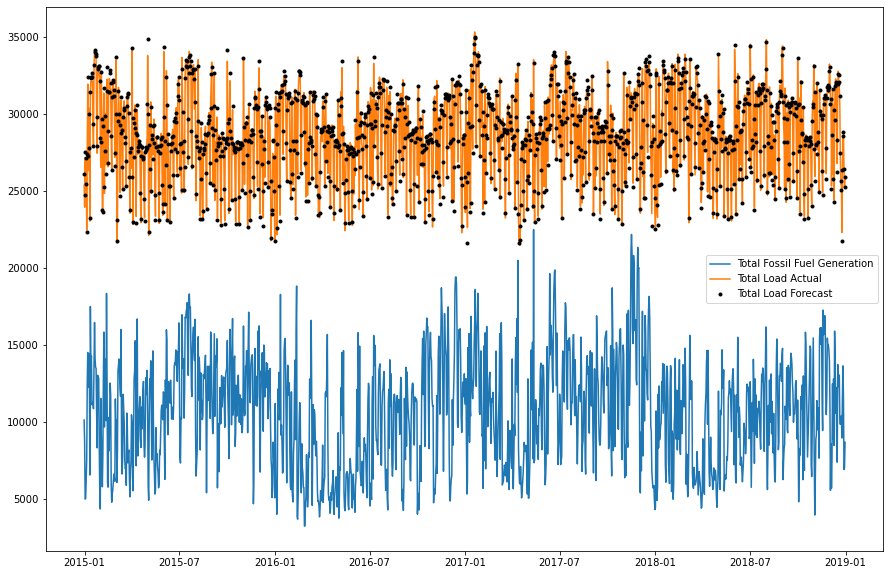

In [16]:


#Create a plot of the fossil fuel consumption vs load
plt.figure(figsize=(15, 10))
plt.plot(daily_fossil_generation.sum(axis=1), label='Total Fossil Fuel Generation')
plt.plot(daily_df['total load actual'], label= 'Total Load Actual')
plt.plot(daily_df['total load forecast'], label= 'Total Load Forecast', marker='.', linestyle='None', color='black')

plt.legend()

# The following section  deals with database design

In [17]:
#prepare data for database

#change all column names to upper case and remove special characters and spaces
db_cols = daily_fossil_generation.reset_index().columns.str.upper().str.replace('GENERATION FOSSIL', 'GEN').str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

db_cols


C:\Users\mikeg\AppData\Local\Temp\ipykernel_20632\726659299.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  db_cols = daily_fossil_generation.reset_index().columns.str.upper().str.replace('GENERATION FOSSIL', 'GEN').str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')
C:\Users\mikeg\AppData\Local\Temp\ipykernel_20632\726659299.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  db_cols = daily_fossil_generation.reset_index().columns.str.upper().str.replace('GENERATION FOSSIL', 'GEN').str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')


Index(['TIME', 'GEN_BROWN_COAL_LIGNITE', 'GEN_GAS', 'GEN_HARD_COAL',
       'GEN_OIL'],
      dtype='object')

In [18]:
# Create a new dataframe with the new column names
db_df = daily_fossil_generation.reset_index().copy().rename(columns=dict(zip(daily_fossil_generation.reset_index().columns, db_cols)))

## Final energy table

In [19]:
db_df.head()

,TIME,GEN_BROWN_COAL_LIGNITE,GEN_GAS,GEN_HARD_COAL,GEN_OIL
0,2014-12-31,329.000000,4844.000000,4821.000000,162.000000
1,2015-01-01,243.708333,4187.791667,4099.458333,161.500000
2,2015-01-02,0.000000,3566.166667,1258.125000,200.833333
3,2015-01-03,0.000000,3451.791667,1375.958333,229.791667
4,2015-01-04,13.583333,3526.125000,2315.291667,356.625000


In [20]:
db_df.reset_index().dtypes

index                              int64
TIME                      datetime64[ns]
GEN_BROWN_COAL_LIGNITE           float64
GEN_GAS                          float64
GEN_HARD_COAL                    float64
GEN_OIL                          float64
dtype: object

In [21]:
#import database sqliite3 package
import sqlite3

#print *.db files in the working directory
print([file for file in os.listdir(path) if file.endswith('.db')])

['renewable_spain.db']


In [23]:
#connect to the database
conn = sqlite3.connect(path + '\\renewable_spain.db')

#Create a cursor
c = conn.cursor()




[('energy_dataset',), ('time_stamps',)]


In [24]:
#store the dataframe in the database, using the table name 'fossil_fuel_generation'
db_df.to_sql('fossil_fuel_generation', conn, if_exists='replace', index=False)

1462

In [25]:
#read table names from the database
c.execute("SELECT name FROM sqlite_master WHERE type='table';")

#print table names
print(c.fetchall())


[('energy_dataset',), ('time_stamps',), ('fossil_fuel_generation',)]


In [26]:
#close the connection
conn.close()